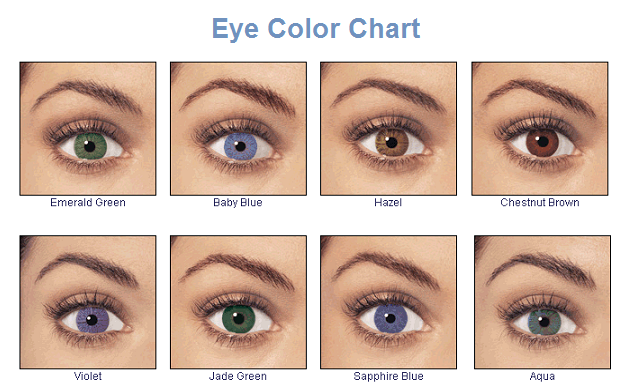

In [1]:
import cv2

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [3]:
import numpy as np

In [ ]:
def chestnut_brown(eye_img,hsv,x,y):
    # chestnut brown ->149, 69, 53
    brown_l = np.array([93, 47, 39],np.uint8)
    brown_u = np.array([149, 69, 53],np.uint8)
    brownM = cv2.inRange(hsv,brown_l,brown_u)
            
    kernal = np.ones((5,5),'uint8')
    brownM = cv2.dilate(brownM,kernal)
    chestnut = cv2.bitwise_and(eye_img,eye_img,mask=brownM)
        
    cont,hier = cv2.findContours(brownM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for pic,cont in enumerate(cont):
        area = cv2.contourArea(cont)
        if(area>50):
            bx, by, bw, bh = cv2.boundingRect(cont)
            eye_img = cv2.rectangle(eye_img,(bx,by),(bx+bw,by+bh),(0,255,0),2)
            cv2.putText(img,"Chestnut Brown",(x,y),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,255,0))
            

def hazel(eye_img,hsv,x,y):
    # hazel-> (201, 199, 137)
    hazel_l = np.array([201,199,137],np.uint8)
    hazel_u = np.array([208,202,140],np.uint8)
    hazelM = cv2.inRange(hsv,hazel_l,hazel_u)
       
    kernal = np.ones((5,5),'uint8')    
    hazelM = cv2.dilate(hazelM,kernal)
    hazel = cv2.bitwise_and(eye_img,eye_img,mask = hazelM)
    cont,hier = cv2.findContours(hazelM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            
    for pic,cont in enumerate(cont):
        area = cv2.contourArea(cont)
        if(area>50):
            bx, by, bw, bh = cv2.boundingRect(cont)
            eye_img = cv2.rectangle(eye_img,(bx,by),(bx+bw,by+bh),(0,255,0),2)
            cv2.putText(img,"Hazel",(x,y),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,255,0))


cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH,1200)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT,700)
while cap.isOpened():
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in face:
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_img = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for(ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_img,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
            
            eye_img = roi_img[ey:ey+eh,ex:ex+ew]
            hsv = cv2.cvtColor(eye_img,cv2.COLOR_BGR2HSV)
            
            chestnut_brown(eye_img,hsv,x,y)
            
            hazel(eye_img,hsv,x,y)
            
            
                 
    cv2.imshow("Image",img)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()
        

In [5]:
cap.release()
cv2.destroyAllWindows()

In [18]:
            # chestnut brown ->149, 69, 53
#             brown_l = np.array([93, 47, 39],np.uint8)
#             brown_u = np.array([149, 69, 53],np.uint8)
#             brownM = cv2.inRange(hsv,brown_l,brown_u)
            
#             kernal = np.ones((5,5),'uint8')
#             brownM = cv2.dilate(brownM,kernal)
#             chestnut = cv2.bitwise_and(eye_img,eye_img,mask=brownM)
        
#             cont,hier = cv2.findContours(brownM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#             for pic,cont in enumerate(cont):
#                 area = cv2.contourArea(cont)
#                 if(area>50):
#                     bx, by, bw, bh = cv2.boundingRect(cont)
#                     eye_img = cv2.rectangle(eye_img,(bx,by),(bx+bw,by+bh),(0,255,0),2)
#                     cv2.putText(img,"Chestnut Brown",(x,y),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,255,0))




                    
            # hazel-> (201, 199, 137)
#             hazel_l = np.array([201,199,137],np.uint8)
#             hazel_u = np.array([208,202,140],np.uint8)
#             hazelM = cv2.inRange(hsv,hazel_l,hazel_u)
            
#             hazelM = cv2.dilate(hazelM,kernal)
#             hazel = cv2.bitwise_and(eye_img,eye_img,mask = hazelM)
#             cont,hier = cv2.findContours(hazelM,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            
#             for pic,cont in enumerate(cont):
#                 area = cv2.contourArea(cont)
#                 if(area>50):
#                     bx, by, bw, bh = cv2.boundingRect(cont)
#                     eye_img = cv2.rectangle(eye_img,(bx,by),(bx+bw,by+bh),(0,255,0),2)
#                     cv2.putText(img,"Hazel",(x,y),cv2.FONT_HERSHEY_SIMPLEX,1.0,(0,255,0))
